# Введение в искусственные нейронные сети
# Урок 4. Сверточные нейронные сети

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Input
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten

import os

In [2]:
tf.random.set_seed(1)

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
results = pd.DataFrame() # сводная таблица результатов
step = [] # шаг
desc = [] # описание
train_acc = [] # результат на трейне
test_acc = [] # результат на тесте

In [5]:
# установка параметров нейросети
batch_size = 64
num_classes = 10
epochs = 10

# разделение тренировочной и тестовой выборки
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'тренировочные примеры')
print(X_test.shape[0], 'тестовые примеры')

# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


X_train = X_train / 255.0
X_test = X_test / 255.0

170498071/170498071 [==============================] - 13s 0us/step
X_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


In [6]:
classes = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

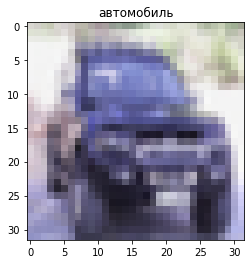

In [9]:
N = 9

plt.imshow(X_test[N])
plt.title(classes[np.argmax(y_test[N, :])])
plt.show()

In [10]:
# конфигурирование слоев нейросети
model_1 = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model_1.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model_1.add(Activation('relu'))
model_1.add(Conv2D(32, (3, 3)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

model_1.add(Conv2D(64, (3, 3), padding='same'))
model_1.add(Activation('relu'))
model_1.add(Conv2D(64, (3, 3)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

# полносвязные слои нейронной сети
model_1.add(GlobalAveragePooling2D())
model_1.add(Dense(64))
model_1.add(Activation('relu'))
model_1.add(Dense(32))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()
# компиляция модели
model_1.compile(loss='categorical_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                        

In [11]:
history_1 = model_1.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(X_test, y_test))

Epoch 1/10
782/782 [==============================] - 14s 8ms/step - loss: 1.9711 - accuracy: 0.2274 - val_loss: 1.7531 - val_accuracy: 0.3296
Epoch 2/10
782/782 [==============================] - 7s 8ms/step - loss: 1.7063 - accuracy: 0.3393 - val_loss: 1.4979 - val_accuracy: 0.4339
Epoch 3/10
782/782 [==============================] - 6s 7ms/step - loss: 1.5625 - accuracy: 0.4143 - val_loss: 1.3688 - val_accuracy: 0.4922
Epoch 4/10
782/782 [==============================] - 6s 7ms/step - loss: 1.4471 - accuracy: 0.4673 - val_loss: 1.2636 - val_accuracy: 0.5358
Epoch 5/10
782/782 [==============================] - 6s 7ms/step - loss: 1.3732 - accuracy: 0.5014 - val_loss: 1.1736 - val_accuracy: 0.5725
Epoch 6/10
782/782 [==============================] - 6s 8ms/step - loss: 1.3019 - accuracy: 0.5314 - val_loss: 1.1701 - val_accuracy: 0.5809
Epoch 7/10
782/782 [==============================] - 6s 7ms/step - loss: 1.2539 - accuracy: 0.5507 - val_loss: 1.0610 - val_accuracy: 0.6225
Epoch

In [12]:
train_loss, train_m = model_1.evaluate(X_train, y_train, verbose=2)
test_loss, test_m = model_1.evaluate(X_test, y_test, verbose=2)
print(f'train_loss: {train_loss}, train_accuracy: {train_m}')
print(f'test_loss: {test_loss}, test_accuracy: {test_m}')

step.append(1)
desc.append('Базовая модель')
train_acc.append(round(train_m, 2))
test_acc.append(round(test_m, 2))

1563/1563 - 5s - loss: 0.9286 - accuracy: 0.6640 - 5s/epoch - 3ms/step
313/313 - 1s - loss: 0.9843 - accuracy: 0.6528 - 908ms/epoch - 3ms/step
train_loss: 0.9286259412765503, train_accuracy: 0.6639800071716309
test_loss: 0.9842723608016968, test_accuracy: 0.6528000235557556


1/1 [==============================] - 0s 177ms/step


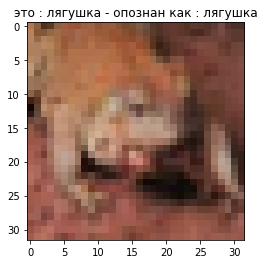

In [13]:
N = 5
y_p = model_1.predict(X_test[N:N+1])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(X_test[N])
plt.title(f'это : {classes[y_t[0]]} - опознан как : {classes[y_i[0]]}')
plt.show()

In [14]:
# конфигурирование слоев нейросети
model_2 = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model_2.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model_2.add(Activation('relu'))
model_2.add(Conv2D(64, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(128, (3, 3), padding='same'))
model_2.add(Activation('relu'))
model_2.add(Conv2D(256, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

# полносвязные слои нейронной сети
model_2.add(GlobalAveragePooling2D())
model_2.add(Dense(64))
model_2.add(Activation('relu'))
model_2.add(Dense(32))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))

model_2.summary()
# компиляция модели
model_2.compile(loss='categorical_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_7 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 64)        18496     
                                                                 
 activation_8 (Activation)   (None, 30, 30, 64)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 15, 15, 64)        0         
                                                      

In [15]:
history_2 = model_2.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(X_test, y_test))

Epoch 1/10
782/782 [==============================] - 12s 14ms/step - loss: 1.9526 - accuracy: 0.2411 - val_loss: 1.6589 - val_accuracy: 0.3634
Epoch 2/10
782/782 [==============================] - 10s 13ms/step - loss: 1.6272 - accuracy: 0.3854 - val_loss: 1.4216 - val_accuracy: 0.4661
Epoch 3/10
782/782 [==============================] - 10s 13ms/step - loss: 1.4582 - accuracy: 0.4628 - val_loss: 1.2480 - val_accuracy: 0.5395
Epoch 4/10
782/782 [==============================] - 10s 13ms/step - loss: 1.3423 - accuracy: 0.5159 - val_loss: 1.1410 - val_accuracy: 0.5845
Epoch 5/10
782/782 [==============================] - 10s 13ms/step - loss: 1.2516 - accuracy: 0.5518 - val_loss: 1.0713 - val_accuracy: 0.6103
Epoch 6/10
782/782 [==============================] - 10s 13ms/step - loss: 1.1731 - accuracy: 0.5864 - val_loss: 1.0187 - val_accuracy: 0.6344
Epoch 7/10
782/782 [==============================] - 11s 13ms/step - loss: 1.1064 - accuracy: 0.6128 - val_loss: 0.9498 - val_accuracy:

In [16]:
train_loss, train_m = model_2.evaluate(X_train, y_train, verbose=2)
test_loss, test_m = model_2.evaluate(X_test, y_test, verbose=2)
print(f'train_loss: {train_loss}, train_accuracy: {train_m}')
print(f'test_loss: {test_loss}, test_accuracy: {test_m}')

step.append(2)
desc.append('Шире - больше каналов')
train_acc.append(round(train_m, 2))
test_acc.append(round(test_m, 2))

1563/1563 - 6s - loss: 0.7787 - accuracy: 0.7242 - 6s/epoch - 4ms/step
313/313 - 1s - loss: 0.8668 - accuracy: 0.6953 - 1s/epoch - 3ms/step
train_loss: 0.7787320017814636, train_accuracy: 0.7241799831390381
test_loss: 0.8668431639671326, test_accuracy: 0.6952999830245972


1/1 [==============================] - 0s 137ms/step


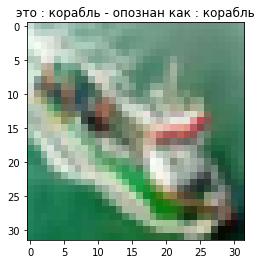

In [17]:
N = 15
y_p = model_2.predict(X_test[N:N+1])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(X_test[N])
plt.title(f'это : {classes[y_t[0]]} - опознан как : {classes[y_i[0]]}')
plt.show()

In [18]:
# конфигурирование слоев нейросети
model_3 = Sequential()

# слои нейросети отвественные за свертку и max-pooling
model_3.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model_3.add(Activation('relu'))
model_3.add(Conv2D(32, (3, 3)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(64, (3, 3), padding='same'))
model_3.add(Activation('relu'))
model_3.add(Conv2D(64, (3, 3)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(64, (3, 3), padding='same'))
model_3.add(Activation('relu'))
model_3.add(Conv2D(64, (3, 3)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))


# полносвязные слои нейронной сети
model_3.add(GlobalAveragePooling2D())
model_3.add(Dense(64))
model_3.add(Activation('relu'))
model_3.add(Dense(32))
model_3.add(Activation('relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(num_classes))
model_3.add(Activation('softmax'))

model_3.summary()
# компиляция модели
model_3.compile(loss='categorical_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_14 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_15 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 15, 15, 32)        0         
                                                      

In [19]:
history_3 = model_3.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(X_test, y_test))     

Epoch 1/10
782/782 [==============================] - 8s 9ms/step - loss: 1.9704 - accuracy: 0.2335 - val_loss: 1.7035 - val_accuracy: 0.3542
Epoch 2/10
782/782 [==============================] - 6s 8ms/step - loss: 1.6588 - accuracy: 0.3734 - val_loss: 1.3694 - val_accuracy: 0.4834
Epoch 3/10
782/782 [==============================] - 6s 8ms/step - loss: 1.4503 - accuracy: 0.4718 - val_loss: 1.2565 - val_accuracy: 0.5429
Epoch 4/10
782/782 [==============================] - 7s 9ms/step - loss: 1.2966 - accuracy: 0.5423 - val_loss: 1.1767 - val_accuracy: 0.5733
Epoch 5/10
782/782 [==============================] - 6s 8ms/step - loss: 1.2044 - accuracy: 0.5832 - val_loss: 1.0323 - val_accuracy: 0.6291
Epoch 6/10
782/782 [==============================] - 7s 9ms/step - loss: 1.1304 - accuracy: 0.6078 - val_loss: 0.9434 - val_accuracy: 0.6726
Epoch 7/10
782/782 [==============================] - 6s 8ms/step - loss: 1.0666 - accuracy: 0.6344 - val_loss: 0.9049 - val_accuracy: 0.6872
Epoch 

In [20]:
train_loss, train_m = model_3.evaluate(X_train, y_train, verbose=2)
test_loss, test_m = model_3.evaluate(X_test, y_test, verbose=2)
print(f'train_loss: {train_loss}, train_accuracy: {train_m}')
print(f'test_loss: {test_loss}, test_accuracy: {test_m}')

step.append(3)
desc.append('Глубже - больше слоев')
train_acc.append(round(train_m,2))
test_acc.append(round(test_m,2))

1563/1563 - 5s - loss: 0.6988 - accuracy: 0.7544 - 5s/epoch - 3ms/step
313/313 - 1s - loss: 0.8291 - accuracy: 0.7204 - 948ms/epoch - 3ms/step
train_loss: 0.6988332867622375, train_accuracy: 0.7544400095939636
test_loss: 0.8291138410568237, test_accuracy: 0.7203999757766724


1/1 [==============================] - 0s 150ms/step


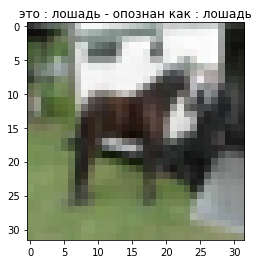

In [22]:
N = 20
y_p = model_3.predict(X_test[N:N+1])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(X_test[N])
plt.title(f'это : {classes[y_t[0]]} - опознан как : {classes[y_i[0]]}')
plt.show()

Полносвязная сеть для этой выборки

In [23]:
# конфигурирование слоев нейросети
model_4 = Sequential()

# полносвязные слои нейронной сети
model_4.add(Flatten(input_shape=X_train.shape[1:]))
model_4.add(Dense(512))
model_4.add(Activation('relu'))
model_4.add(Dense(256))
model_4.add(Activation('relu'))
model_4.add(Dropout(0.5))
model_4.add(Dense(num_classes))
model_4.add(Activation('softmax'))

model_4.summary()
# компиляция модели
model_4.compile(loss='categorical_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense_9 (Dense)             (None, 512)               1573376   
                                                                 
 activation_23 (Activation)  (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 activation_24 (Activation)  (None, 256)               0         
                                                                 
 dropout_10 (Dropout)        (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 10)               

In [24]:
history_4 = model_4.fit(X_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(X_test, y_test))

Epoch 1/10
782/782 [==============================] - 4s 5ms/step - loss: 1.9835 - accuracy: 0.2781 - val_loss: 1.7610 - val_accuracy: 0.3607
Epoch 2/10
782/782 [==============================] - 3s 4ms/step - loss: 1.7760 - accuracy: 0.3607 - val_loss: 1.6616 - val_accuracy: 0.4073
Epoch 3/10
782/782 [==============================] - 4s 5ms/step - loss: 1.7113 - accuracy: 0.3875 - val_loss: 1.6030 - val_accuracy: 0.4311
Epoch 4/10
782/782 [==============================] - 3s 4ms/step - loss: 1.6433 - accuracy: 0.4110 - val_loss: 1.6110 - val_accuracy: 0.4244
Epoch 5/10
782/782 [==============================] - 3s 4ms/step - loss: 1.6143 - accuracy: 0.4250 - val_loss: 1.5496 - val_accuracy: 0.4420
Epoch 6/10
782/782 [==============================] - 3s 4ms/step - loss: 1.5909 - accuracy: 0.4336 - val_loss: 1.5516 - val_accuracy: 0.4527
Epoch 7/10
782/782 [==============================] - 3s 4ms/step - loss: 1.5712 - accuracy: 0.4404 - val_loss: 1.5222 - val_accuracy: 0.4555
Epoch 

In [25]:
train_loss, train_m = model_4.evaluate(X_train, y_train, verbose=2)
test_loss, test_m = model_4.evaluate(X_test, y_test, verbose=2)
print(f'train_loss: {train_loss}, train_accuracy: {train_m}')
print(f'test_loss: {test_loss}, test_accuracy: {test_m}')

step.append(4)
desc.append('Полносвязная сеть')
train_acc.append(round(train_m,2))
test_acc.append(round(test_m,2))

1563/1563 - 3s - loss: 1.4314 - accuracy: 0.4856 - 3s/epoch - 2ms/step
313/313 - 1s - loss: 1.4949 - accuracy: 0.4709 - 672ms/epoch - 2ms/step
train_loss: 1.4314383268356323, train_accuracy: 0.4856399893760681
test_loss: 1.4949039220809937, test_accuracy: 0.4708999991416931


1/1 [==============================] - 0s 48ms/step


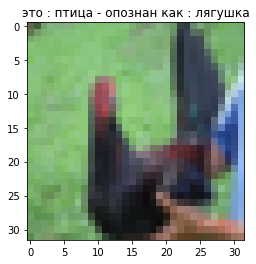

In [26]:
N = 25
y_p = model_4.predict(X_test[N:N+1])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(X_test[N])
plt.title(f'это : {classes[y_t[0]]} - опознан как : {classes[y_i[0]]}')
plt.show()

In [27]:
results['step'] = step
results['desc'] = desc
results['train_acc'] = train_acc
results['test_acc'] = test_acc
results

,step,desc,train_acc,test_acc
0,1,Базовая модель,0.66,0.65
1,2,Шире - больше каналов,0.72,0.70
2,3,Глубже - больше слоев,0.75,0.72
3,4,Полносвязная сеть,0.49,0.47


### Выводы:<br>
Базовая модель показала результаты: 0.66	0.65 (трейн/тест)

Увеличение количества каналов дало улучшение результатов до 0.72	0.70 (трейн/тест)

Увеличение числа слоев дало лучшее увеличение точности 0.75	0.72 (трейн/тест)

Полносвязная сеть дала результат хуже базовой модели 0.49	0.47 (трейн/тест)